In [794]:
import pandas as pd
import matplotlib.pylab as plt
import string                            #导入字符串模块

# 数据预处理

In [795]:
tab1 = "./hair_dryer.tsv"
print(tab1)

./hair_dryer.tsv


In [796]:
tab2 = "."

In [797]:
df_hd = pd.read_csv(tab1, sep='\t', header=0)

In [798]:
df_hd.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,N,Y,Works great,Works great!,8/31/2015
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",8/31/2015
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,N,Y,Five Stars,Love this dryer!,8/31/2015
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,N,Y,Five Stars,styling hair in style,8/31/2015
4,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,8/31/2015


## 删除无效信息

### 既没有购买也没有受邀

In [799]:
df_hd = df_hd[~(df_hd['vine'].str.contains("N") & df_hd['verified_purchase'].str.contains("N"))]

### 删除 helpful 和 total 过少的

In [800]:
df_hd = df_hd[(df_hd['total_votes'] > 0) & (df_hd['helpful_votes'] > 0)]

### 评论条数过少
按照 product_parent 进行分类

In [801]:
df_hd = df_hd.groupby('product_parent').filter(lambda x: len(x) > 1)

print(len(df_hd))

2775


In [464]:
df_hd.describe(include="all")

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,preprocessed
count,9989,9.989000e+03,9989,9989,9.989000e+03,9989,9989,9989.000000,9989.000000,9989.000000,9989,9989,9987,9989,9989,9989
unique,1,NaN,9989,424,NaN,389,1,NaN,NaN,NaN,2,2,6586,9734,1993,9485
top,US,NaN,R1IJT3NFBYHIEH,B003V264WW,NaN,remington ac2015 t|studio salon collection pea...,Beauty,NaN,NaN,NaN,N,Y,Five Stars,good,8/5/2010,love
freq,9989,NaN,1,534,NaN,534,9989,NaN,NaN,NaN,9810,9811,1221,19,106,66
mean,NaN,2.792441e+07,NaN,NaN,4.806681e+08,NaN,NaN,4.188607,1.665632,1.990890,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.525756e+07,NaN,NaN,2.864728e+08,NaN,NaN,1.234705,12.476679,13.542958,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.246400e+04,NaN,NaN,4.239600e+05,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.478288e+07,NaN,NaN,2.261264e+08,NaN,NaN,4.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.663639e+07,NaN,NaN,4.867740e+08,NaN,NaN,5.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.217518e+07,NaN,NaN,7.322523e+08,NaN,NaN,5.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
df_hd.dtypes

marketplace          object
customer_id           int64
review_id            object
product_id           object
product_parent        int64
product_title        object
product_category     object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
review_headline      object
review_body          object
review_date          object
dtype: object

In [255]:
df_hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2775 entries, 7 to 11469
Data columns (total 15 columns):
marketplace          2775 non-null object
customer_id          2775 non-null int64
review_id            2775 non-null object
product_id           2775 non-null object
product_parent       2775 non-null int64
product_title        2775 non-null object
product_category     2775 non-null object
star_rating          2775 non-null int64
helpful_votes        2775 non-null int64
total_votes          2775 non-null int64
vine                 2775 non-null object
verified_purchase    2775 non-null object
review_headline      2775 non-null object
review_body          2775 non-null object
review_date          2775 non-null object
dtypes: int64(5), object(10)
memory usage: 346.9+ KB


## 按照 id 进行分组

### product_id

In [256]:
gp_pid = df_hd.groupby('product_id')

# 选特定的一组
print(gp_pid.get_group('B003V264WW')['star_rating'])

# 遍历
for item in gp_pid:
    print(item[0])
    print(item[1]['star_rating'])

282      1
363      2
448      3
504      3
730      5
        ..
10083    5
10129    5
10135    3
10139    5
10142    5
Name: star_rating, Length: 90, dtype: int64
B00005O0MZ
186      2
378      5
613      4
627      5
860      5
        ..
11397    5
11406    5
11446    2
11467    5
11469    3
Name: star_rating, Length: 74, dtype: int64
B000065DJY
55      2
327     5
458     1
618     1
2019    4
3427    4
3991    5
5746    5
6060    5
7231    5
Name: star_rating, dtype: int64
B00006IV22
154      1
179      1
274      1
608      3
891      2
931      5
999      5
1043     5
1236     4
1291     5
1299     5
1340     4
1420     5
1545     3
1667     5
2491     4
2571     5
2631     5
3306     5
3425     1
3554     5
4114     1
4917     5
5015     2
5280     4
5562     3
5707     5
5764     5
5873     5
6045     4
6139     5
6183     5
6328     5
6485     5
7162     4
7176     5
7878     4
8056     3
8318     1
8395     4
8905     5
9154     1
9481     5
9687     4
9795     5
10125    1

### product_parent

In [257]:
gp_pp = df_hd.groupby('product_parent')

# # 选特定的一组
# print(gp_pp.get_group(732252283)['star_rating'])

# # 遍历
# for item in gp_pp:
#     print(item[0])
#     print(item[1]['star_rating'])

# gp_pp[['star_rating', 'helpful_votes', 'total_votes']].sum()

gp_pp[['star_rating', 'helpful_votes', 'total_votes']].sum().sort_values(by='helpful_votes',ascending=False)


,star_rating,helpful_votes,total_votes
product_parent,,,
758099411,597,1662,1943
47684938,454,877,923
732252283,332,625,677
127343313,194,534,579
694290590,284,483,508
...,...,...,...
168649310,22,10,11
791081896,12,8,12
54987170,21,6,6


In [258]:
df_pp = gp_pp.get_group(758099411)
df_pp

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
296,US,11821084,R1WN126DEQYYLR,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,5,1,1,N,Y,My wife loves it (I did good on this one),It will seriously dim the lights in your house...,8/7/2015
787,US,11629881,RUIS0SWYLIXFP,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,3,1,1,N,Y,"Cheap, but marginal at best...",I had high hopes for this dryer based on the r...,6/25/2015
843,US,37352394,R1C0FK0969SU1V,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,5,3,4,N,Y,Improved My Hair Style,If I had only known what a difference a hair d...,6/19/2015
995,US,28597406,R45E5WY8GZPIH,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,1,10,12,N,Y,What a disappointment!,I have always bought Conair products in the pa...,6/8/2015
1013,US,51840199,R16P9RYCVZSP7,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,5,2,2,N,Y,Don't ask Dogs their opinions,Been using this twice daily for over a year. S...,6/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10733,US,32890035,R28D0A0WWNCGUF,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,5,4,4,N,Y,Would buy again and did!,"This is light weight, inexpensive, and was a g...",8/24/2009
10736,US,29350116,R13MVLELEXVD4X,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,3,3,11,N,Y,Dryer,"My hair is curly, so I think this dryer is not...",8/21/2009
10772,US,52158465,R1MAA5BQFDBP46,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,5,45,57,N,Y,great hairdryer for a good price,I bought this hair dryer to replace an old Con...,6/23/2009
10876,US,12590234,R1F2PGWA1SN4PU,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,5,304,321,N,Y,Conair 225 hairdryer,My old Conair died so I read all the reviews a...,3/7/2009


### product_title

In [259]:
gp_pt = df_hd.groupby('product_title')

# 选特定的一组
print(gp_pt.get_group('andis micro turbo hair dryer')['star_rating'])

# 遍历
for item in gp_pt:
    print(item[0])
    print(item[1]['star_rating'])

40       5
209      5
541      5
559      5
704      5
        ..
11215    4
11239    5
11248    2
11254    5
11258    5
Name: star_rating, Length: 62, dtype: int64
FHI Heat Platform Nano Salon Pro 2000 Powerful Tourmaline Ceramic Hair Dryer
10498    1
Name: star_rating, dtype: int64
Hot Tools Professional 800 Watt Ionic Soft Bonnet Hair Dryer, Black & White
11297    1
Name: star_rating, dtype: int64
Reach Gentle Gum Care Woven Dental Floss, Fluoride, 50-Yard Dispensers
10262    5
10396    5
Name: star_rating, dtype: int64
Remington D3710 Ceramic Fast Finish Dual Fan Turbo Hair Dryer, 1875 Watts
9380    2
Name: star_rating, dtype: int64
andis 1600-watt quiet wall mounted hangup hair dryer, white (30135)
3697    5
5972    1
6696    2
6997    5
7256    5
7588    3
Name: star_rating, dtype: int64
andis 1600w quiet hangup hair dryer with night light
408      3
467      4
494      5
636      1
1286     5
1421     1
2111     5
2696     3
2940     3
5303     3
5581     4
5782     5
5893     4

# 文本分析

## 整体文本分析

### 读取文件，并分词

In [210]:
reviews = ''
for review in df_pp['review_body']:
    reviews = reviews + ' ' + review
hist = {}                                 #创建一个空字典，放词频与单词，无序排列
data = []                                 #创建一个空列表，放词频与单词，有序：从多到少
content = reviews.replace('-',' ')       #连字符—用空格代替
words = content.split()                   #字符串按空格分割--分词

### 保存全部评论 2 txt

In [211]:
# fw = open("./reviews.txt", 'w')    #将要输出保存的文件地址
# fw.write(reviews)

### 迭代处理：将字典变列表，存入数据

In [212]:
for i in range(len(words)):
    words[i] = words[i].strip(string.punctuation)  #去掉标点符号，去掉首尾
    words[i] = words[i].lower()                    #统一大小写
    if words[i] in hist:                          #统计词频与单词
        hist[words[i]] = hist[words[i]] + 1        #不是第一次
    else:
        hist[words[i]] = 1                         #第一次
# print(hist)

### 删除介词

In [213]:
excludes={"not","if","setting","about","really","too","br","has","very", "so","on","at","when", "was","one","had", "it's","than","would","the","and","of","you","a","with","but","as","be","in","or","are", "i", "it", "to", "hair","this", "is", "my", "dryer", "for", "that", "have"}
for word in excludes:
    if word in hist:
        del(hist[word])

### 遍历添加

In [214]:
for key, value in hist.items():                    #遍历字典
    temp = [value,key]                              #变量，变量值
    data.append(temp)                               #添加数据
data.sort(reverse=True)                            #排序

# for i in range(0,300):
#     print(data[i]) 

### 绘制直方图

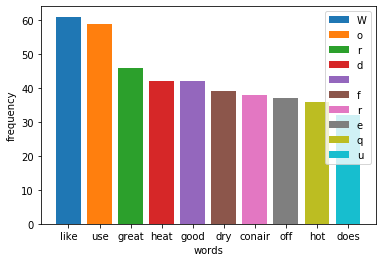

In [215]:
for i in range(0,10):
    plt.bar((data[i][1],),(data[i][0],))
plt.xlabel('words')                                   # 显示x轴名称
plt.ylabel('frequency')                                   # 显示y轴名称
plt.legend('Word frequency histogram')                             #显示图例
plt.show()                                            #显示作图结果


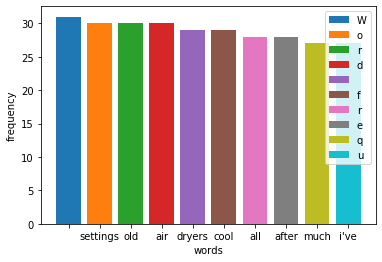

In [216]:
for i in range(10,20):
    plt.bar((data[i][1],),(data[i][0],))
plt.xlabel('words')                                   # 显示x轴名称
plt.ylabel('frequency')                                   # 显示y轴名称
plt.legend('Word frequency histogram')                             #显示图例
plt.show()    

# 文本分析（短语）

In [398]:
df_pp_one_star = df_pp[df_pp['star_rating'] == 1]

pattern = r"\&\#[0-9]+\;"

df_pp["preprocessed"] = df_pp["review_body"].str.replace(pat=pattern, repl="", regex=True)

print(df_pp["preprocessed"].iloc[5])

The on/off and heat selector buttons are not toggle or rocker switch like other ones it seems to wobble when operated and feel it might not last as long as others.  I do not use often but others in family will.  Will have to see how it wears.


/home/alphonse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [399]:
import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

#import nltk resources
resources = ["wordnet", "stopwords", "punkt", \
             "averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]

for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)
    except LookupError:
        nltk.download(resource)

#create Lemmatizer object
lemma = WordNetLemmatizer()

def lemmatize_word(tagged_token):
    """ Returns lemmatized word given its tag"""
    root = []
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        if tag.startswith('J'):
            root.append(lemma.lemmatize(word, wordnet.ADJ))
        elif tag.startswith('V'):
            root.append(lemma.lemmatize(word, wordnet.VERB))
        elif tag.startswith('N'):
            root.append(lemma.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('R'):
            root.append(lemma.lemmatize(word, wordnet.ADV))
        else:          
            root.append(word)
    return root


[nltk_data] Downloading package wordnet to /home/alphonse/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alphonse/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/alphonse/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /home/alphonse/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


In [400]:
def lemmatize_doc(document):
    """ Tags words then returns sentence with lemmatized words"""
    lemmatized_list = []
    tokenized_sent = sent_tokenize(document)
    for sentence in tokenized_sent:
        no_punctuation = re.sub(r"[`'\",.!?()]", " ", sentence)
        tokenized_word = word_tokenize(no_punctuation)
        tagged_token = pos_tag(tokenized_word)
        lemmatized = lemmatize_word(tagged_token)
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)

In [401]:
#apply our functions
df_pp["preprocessed"] = df_pp["preprocessed"].apply(lambda row: lemmatize_doc(row))

print(df_pp["preprocessed"].iloc[5])

The on/off and heat selector button be not toggle or rocker switch like other one it seem to wobble when operate and feel it might not last as long as others I do not use often but others in family will Will have to see how it wear


/home/alphonse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [221]:
from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

df_pp["preprocessed"] = df_pp["preprocessed"].apply(remove_accent)

print(df_pp["preprocessed"].iloc[5])

The on/off and heat selector button be not toggle or rocker switch like other one it seem to wobble when operate and feel it might not last as long as others I do not use often but others in family will Will have to see how it wear


/home/alphonse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [222]:
pattern = r"[^\w\s]"

df_pp["preprocessed"] = df_pp["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df_pp["preprocessed"].iloc[5])

The on off and heat selector button be not toggle or rocker switch like other one it seem to wobble when operate and feel it might not last as long as others I do not use often but others in family will Will have to see how it wear


/home/alphonse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [223]:
df_pp["preprocessed"] = df_pp["preprocessed"].str.lower()

print(df_pp["preprocessed"].iloc[5])

the on off and heat selector button be not toggle or rocker switch like other one it seem to wobble when operate and feel it might not last as long as others i do not use often but others in family will will have to see how it wear


/home/alphonse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [224]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

stop_words = [word.replace("\'", "") for word in stop_words]

stop_words.append('br')

print(f"sample stop words: {stop_words[:15]} \n")

remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in stop_words])
df_pp["preprocessed"] = df_pp["preprocessed"].apply(remove_stop_words)

print(df_pp["preprocessed"].iloc[5])

sample stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours'] 

heat selector button toggle rocker switch like one seem wobble operate feel might last long others use often others family see wear


/home/alphonse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [225]:
pattern = r"[\s]+"

df_pp["preprocessed"] = df_pp["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df_pp["preprocessed"].iloc[5])

heat selector button toggle rocker switch like one seem wobble operate feel might last long others use often others family see wear


/home/alphonse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [226]:
corpora = df_pp["preprocessed"].values
tokenized = [corpus.split(" ") for corpus in corpora]

corpora_one_star = df_pp[df_pp['star_rating'] == 1]["preprocessed"].values
tokenized_one_star = [corpus.split(" ") for corpus in corpora_one_star]

print(tokenized_one_star[10])

['really', 'understand', 'good', 'review', 'dryer', 'feel', 'cheap', 'flimsy', 'almost', 'break', 'switch', 'first', 'use', 'see', 'understand', 'talk', 'buy']


In [227]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(tokenized)

tri_gram = Phrases(bi_gram[tokenized])

In [228]:
uni_gram_tokens = set([token for text in tokenized for token in text])
uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))

print(list(uni_gram_tokens)[:50])
print(len(list(uni_gram_tokens)))

['could', 'time', 'design', 'buttons', 'tunnel', 'tickle', 'amazing', 'keeper', 'inner', 'sassoon', 'rid', 'elevated', 'high', 'furnace', 'get', 'destroy', 'breeze', 'er', 'ton', 'expose', 'matte', '25', 'ear', '20', 'comment', 'gale', 'hairdryer', 'rubber', 'wishlist', 'post', 'wind', 'layer', 'able', 'female', 'circa', 'girlfriend', 'fine', 'continue', 'corner', 'confirm', 'smoothing', 'lately', 'slider', 'big', 'bought', 'pet', 'perfectly', 'accidentally', 'attach', 'iron']
1205


In [229]:
bigram_min = bi_gram.min_count

bi_condition = lambda x: x[1] >= bigram_min

bi_gram_tokens = dict(filter(bi_condition, bi_gram.vocab.items()))
bi_gram_tokens = set([token.decode("utf-8") \
                      for token in bi_gram_tokens])

bi_grams_only = bi_gram_tokens.difference(uni_gram_tokens)
print(list(bi_grams_only)[:50])

['hair_dryer', 'still_work', 'old_dryer', 'conair_hair', 'low_high', 'hair_like', 'hair_quickly', 'make_hair', 'blow_dryer', 'long_hair', 'old_conair', 'leave_hair', 'hot_setting', 'dry_hair', 'dryer_get', 'hair_dry', 'heat_setting', 'high_heat', 'curly_hair', 'cool_shot', 'dryer_use', 'great_dryer', 'dryer_ever', 'love_dryer', 'feel_like', 'hair_look', 'would_recommend', 'really_like', 'blow_dry', 'work_well', 'great_hair', 'old_one', 'every_day', 'air_flow', 'tourmaline_ceramic', 'hair_faster', 'shot_button', 'dryer_work', 'hair_fast', 'dryer_great', 'like_hair']


In [230]:
trigram_min = tri_gram.min_count

tri_condition = lambda x: x[1] >= trigram_min

tri_gram_tokens = dict(filter(tri_condition, tri_gram.vocab.items()))
tri_gram_tokens = set([token.decode("utf-8") \
                       for token in tri_gram_tokens])

tri_grams_only = tri_gram_tokens.difference(bi_gram_tokens)
print(list(tri_grams_only)[:50])

['cool_shot_button']


In [232]:
tokenized = [Phraser(tri_gram)[Phraser(bi_gram)[i]] for i in tokenized]

tokenized_one_star = [Phraser(tri_gram)[Phraser(bi_gram)[i]] for i in tokenized_one_star]

In [243]:
tokenized = [list(filter(lambda x: len(x) > 1, document)) \
             for document in tokenized]

tokenized_one_star = [list(filter(lambda x: len(x) > 1, document)) \
             for document in tokenized_one_star]

print(tokenized_one_star[8])

['big', 'fan', 'con', 'air', 'ion', 'dryer', 'general', 'however', 'disappoint', 'product', 'would', 'recommend', 'styling', 'attachment', 'fall', 'time', 'blow', 'dry', 'latch', 'ability', 'attach', 'minimal', 'blowdrying', 'hair', 'expect', 'go', 'fly', 'fall', 'floor', 'extremely', 'frustrating', 'annoy', 'coord', 'short', 'unless', 'outlet', 'right', 'mirror', 'waist', 'level', 'high', 'need', 'extension', 'coord', 'use', 'dryer']


## 生成词云

 feel_like heat_setting


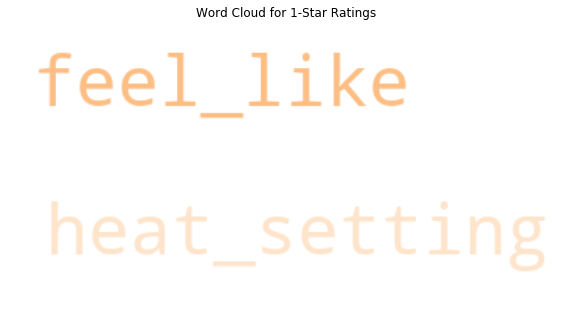

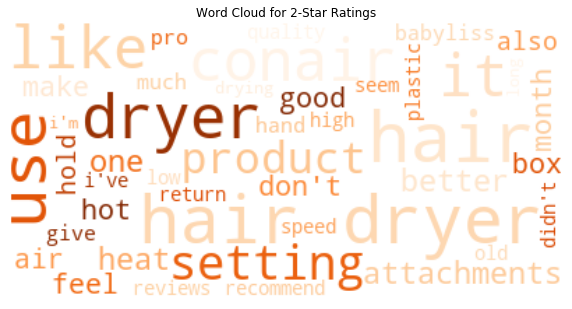

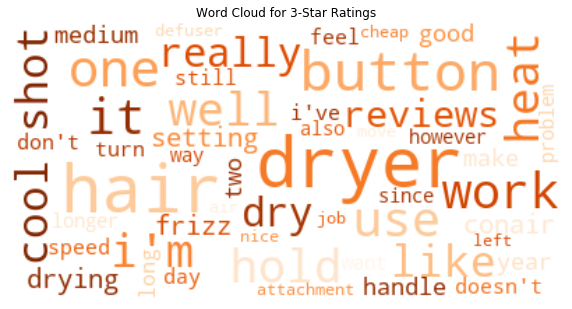

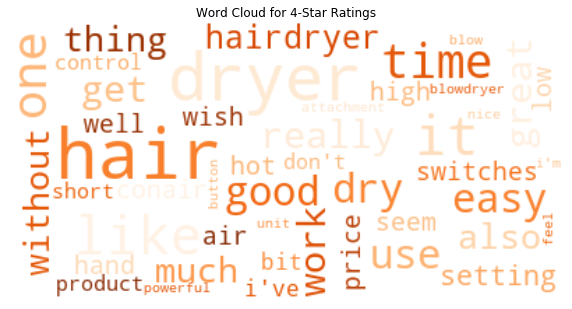

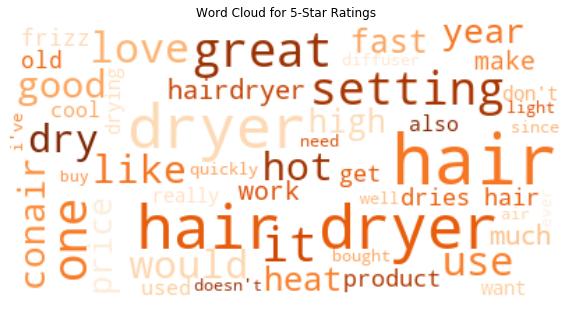

In [244]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords = set(stop_words), min_font_size=10, \
                      max_font_size=50, max_words=50, \
                      background_color="white", colormap = "Oranges")

one_star_text = " ".join(df_pp[df_pp["star_rating"]==1]["review_body"].values).lower()
two_star_text = " ".join(df_pp[df_pp["star_rating"]==2]["review_body"].values).lower()
three_star_text = " ".join(df_pp[df_pp["star_rating"]==3]["review_body"].values).lower()
four_star_text = " ".join(df_pp[df_pp["star_rating"]==4]["review_body"].values).lower()
five_star_text = " ".join(df_pp[df_pp["star_rating"]==5]["review_body"].values).lower()

one_star_text = ''
for items in tokenized_one_star:
    for w in items:
        if w not in list(uni_gram_tokens):
            one_star_text = one_star_text + ' ' + w

print(one_star_text)



text_list = [one_star_text, two_star_text, three_star_text, \
             four_star_text, five_star_text]

for index, text in enumerate(text_list):
    f, axes = plt.subplots(figsize=(10,7))
    wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {index+1}-Star Ratings")
    plt.axis("off")
    plt.show()

# 词性分析

In [744]:
import pandas as pd
import matplotlib.pylab as plt
import string                            #导入字符串模块

In [745]:
tab1 = "./hair_dryer.tsv"
print(tab1)

./hair_dryer.tsv


In [746]:
df_hd = pd.read_csv(tab1, sep='\t', header=0)

### 选择星级

In [747]:
star = 1
df_hd = df_hd[df_hd['star_rating'] == star]


In [748]:
df_hd = df_hd[~(df_hd['vine'].str.contains("N") & df_hd['verified_purchase'].str.contains("N"))]

In [749]:
pattern = r"\&\#[0-9]+\;"

df_hd["preprocessed"] = df_hd["review_body"].str.replace(pat=pattern, repl="", regex=True)

print(df_hd["preprocessed"].iloc[2])

The cold button stuck on the 2nd use.  Now have to have it replaced.  Just annoying to have to deal with this.


In [750]:
import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

#import nltk resources
resources = ["wordnet", "stopwords", "punkt", \
             "averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]

for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)
    except LookupError:
        nltk.download(resource)

#create Lemmatizer object
lemma = WordNetLemmatizer()

def lemmatize_word(tagged_token):
    """ Returns lemmatized word given its tag"""
    root = []
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        if tag.startswith('J'):
            root.append(lemma.lemmatize(word, wordnet.ADJ))
        elif tag.startswith('V'):
            root.append(lemma.lemmatize(word, wordnet.VERB))
        elif tag.startswith('N'):
            root.append(lemma.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('R'):
            root.append(lemma.lemmatize(word, wordnet.ADV))
        else:          
            root.append(word)
    return root





[nltk_data] Downloading package wordnet to /home/alphonse/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alphonse/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/alphonse/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /home/alphonse/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


In [751]:
def lemmatize_doc(document):
    """ Tags words then returns sentence with lemmatized words"""
    lemmatized_list = []
    tokenized_sent = sent_tokenize(document)
    for sentence in tokenized_sent:
        no_punctuation = re.sub(r"[`'\",.!?()]", " ", sentence)
        tokenized_word = word_tokenize(no_punctuation)
        tagged_token = pos_tag(tokenized_word)
        lemmatized = lemmatize_word(tagged_token)
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)

In [752]:
#apply our functions
df_hd["preprocessed"] = df_hd["preprocessed"].apply(lambda row: lemmatize_doc(row))

print(df_hd["preprocessed"].iloc[2])

The cold button stick on the 2nd use Now have to have it replace Just annoy to have to deal with this


In [753]:
from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

df_hd["preprocessed"] = df_hd["preprocessed"].apply(remove_accent)

print(df_hd["preprocessed"].iloc[2])

The cold button stick on the 2nd use Now have to have it replace Just annoy to have to deal with this


In [754]:
pattern = r"[^\w\s]"

df_hd["preprocessed"] = df_hd["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df_hd["preprocessed"].iloc[2])

The cold button stick on the 2nd use Now have to have it replace Just annoy to have to deal with this


In [755]:
df_hd["preprocessed"] = df_hd["preprocessed"].str.lower()

print(df_hd["preprocessed"].iloc[2])

the cold button stick on the 2nd use now have to have it replace just annoy to have to deal with this


In [756]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

stop_words = [word.replace("\'", "") for word in stop_words]
stop_words.append('br')

print(f"sample stop words: {stop_words[:15]} \n")

remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in stop_words])
df_hd["preprocessed"] = df_hd["preprocessed"].apply(remove_stop_words)

print(df_hd["preprocessed"].iloc[2])

sample stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours'] 

cold button stick 2nd use replace annoy deal


In [757]:
pattern = r"[\s]+"

df_hd["preprocessed"] = df_hd["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df_hd["preprocessed"].iloc[2])

cold button stick 2nd use replace annoy deal


In [758]:
corpora = df_hd["preprocessed"].values
tokenized = [corpus.split(" ") for corpus in corpora]

print(tokenized[2])

['cold', 'button', 'stick', '2nd', 'use', 'replace', 'annoy', 'deal']


In [759]:
print(tokenized[4])
text = nltk.pos_tag(tokenized[4])
print(len(text))

['suddenly', 'turn', 'day', 'ago']
4


In [760]:
hist_n = {} #创建一个空字典，放名词词频与单词，无序排列
hist_adj = {} #创建一个空字典，放形容词词频与单词，无序排列
data_n = [] #创建一个空列表，放词频与单词，有序：从多到少
data_adj = [] #创建一个空列表，放形容词词频与单词，有序：从多到少

noun = {'NN', 'NNS', 'NNP', 'NNPS'}
adj = {'JJ', 'JJR', 'JJS'}

In [761]:
for review in tokenized:
    while '' in review:
        review.remove('')
    if len(review) < 1:
        continue
    text = nltk.pos_tag(review)
    if len(text) < 1:
        continue
    for word in text:
        if(word[1] in noun):
            if word[0] in hist_n:                          #统计词频与单词
                hist_n[word[0]] = hist_n[word[0]] + 1        #不是第一次
            else:
                hist_n[word[0]] = 1
        elif(word[1] in adj):
            if word[0] in hist_adj:                          #统计词频与单词
                hist_adj[word[0]] = hist_adj[word[0]] + 1        #不是第一次
            else:
                hist_adj[word[0]] = 1

In [ ]:
for review in tokenized:
    while '' in review:
        review.remove('')
    if len(review) < 1:
        continue
    text = nltk.pos_tag(review)
    

## 名词

### 对无关词进行过滤

In [762]:
excludes={"hairdryer","use","lot","way","love","month","job","thing","buy","review","day","get","product","year","not","if","setting","about","really","too","br","has","very", "so","on","at","when", "was","one","had", "it's","than","would","the","and","of","you","a","with","but","as","be","in","or","are", "i", "it", "to", "hair","this", "is", "my", "dryer", "for", "that", "have"}
for word in excludes:
    if word in hist_n:
        del(hist_n[word])

In [763]:
for key, value in hist_n.items():                    #遍历字典
    temp = [value,key]                              #变量，变量值
    data_n.append(temp)                               #添加数据
data_n.sort(reverse=True)                            #排序

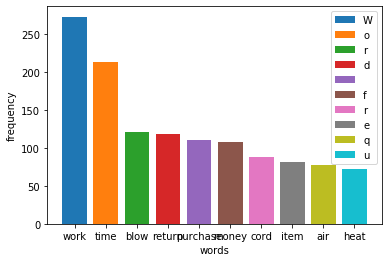

In [764]:
for i in range(0,10):
    plt.bar((data_n[i][1],),(data_n[i][0],))
plt.xlabel('words')                                   # 显示x轴名称
plt.ylabel('frequency')                               # 显示y轴名称
plt.legend('Word frequency histogram')                #显示图例
plt.show()  

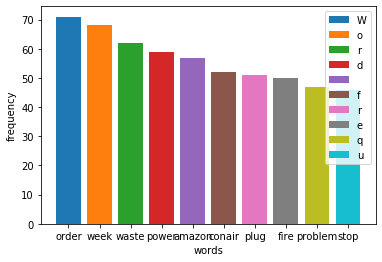

In [765]:
for i in range(10,20):
    plt.bar((data_n[i][1],),(data_n[i][0],))
plt.xlabel('words')                                   # 显示x轴名称
plt.ylabel('frequency')                                   # 显示y轴名称
plt.legend('Word frequency histogram')                             #显示图例
plt.show() 

In [766]:
for i in range(0,20):
    print(data_n)

[[273, 'work'], [213, 'time'], [121, 'blow'], [119, 'return'], [111, 'purchase'], [108, 'money'], [88, 'cord'], [82, 'item'], [78, 'air'], [72, 'heat'], [71, 'order'], [68, 'week'], [62, 'waste'], [59, 'power'], [57, 'amazon'], [52, 'conair'], [51, 'plug'], [50, 'fire'], [47, 'problem'], [46, 'stop'], [46, 'button'], [45, 'price'], [42, 'break'], [41, 'unit'], [38, 'try'], [38, 'replacement'], [37, 'start'], [36, 'speed'], [36, 'burn'], [35, 'turn'], [35, 'look'], [33, 'minute'], [32, 'star'], [31, 'end'], [30, 'something'], [29, 'travel'], [29, 'spark'], [29, 'seller'], [29, 'pay'], [28, 'fan'], [28, 'company'], [27, 'wall'], [27, 'voltage'], [27, 'box'], [26, 'mount'], [26, 'contact'], [26, 'brand'], [25, 'today'], [25, 'switch'], [25, 'quality'], [25, 'piece'], [25, 'model'], [25, 'die'], [24, 'warranty'], [24, 'junk'], [24, 'bonnet'], [23, 'wife'], [23, 'ship'], [22, 'smell'], [22, 'people'], [22, 'diffuser'], [21, 'sound'], [20, 't3'], [20, 'refund'], [20, 'outlet'], [20, 'nothing

## 统计结果保存到文件

In [767]:
df_save = pd.DataFrame({'star_rating':[star]*len(data_n), 'word':[x[1] for x in data_n], 'count':[x[0] for x in data_n] })

In [768]:
df_save.to_csv("word_n_" + str(star) + ".csv",index=False,sep=',')

## 形容词

In [715]:
excludes={"second","first","much","hairdryer","use","lot","way","love","month","job","thing","buy","review","day","get","product","year","not","if","setting","about","really","too","br","has","very", "so","on","at","when", "was","one","had", "it's","than","would","the","and","of","you","a","with","but","as","be","in","or","are", "i", "it", "to", "hair","this", "is", "my", "dryer", "for", "that", "have"}
for word in excludes:
    if word in hist_adj:
        del(hist_adj[word])

In [716]:
for key, value in hist_adj.items():                    #遍历字典
    temp = [value,key]                              #变量，变量值
    data_adj.append(temp)                               #添加数据
data_adj.sort(reverse=True)                            #排序

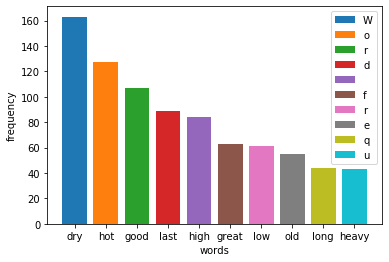

In [717]:
for i in range(0,10):
    plt.bar((data_adj[i][1],),(data_adj[i][0],))
plt.xlabel('words')                                   # 显示x轴名称
plt.ylabel('frequency')                               # 显示y轴名称
plt.legend('Word frequency histogram')                #显示图例
plt.show()  

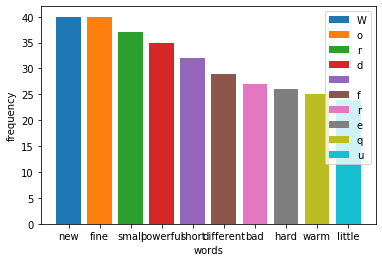

In [718]:
for i in range(10,20):
    plt.bar((data_adj[i][1],),(data_adj[i][0],))
plt.xlabel('words')                                   # 显示x轴名称
plt.ylabel('frequency')                               # 显示y轴名称
plt.legend('Word frequency histogram')                #显示图例
plt.show()  